# Confinement ratio

Use this notebook to find the optimal confinement ratio threshold to separate GO and STOP phases

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import newton
from mint.data_extraction import confinement
from mint.utils import get_file_list

## Find the threshold

In [2]:
input_path = r'/Confinement ratio.csv' # Path to confinement ratio .csv file
data = pd.read_csv(input_path)

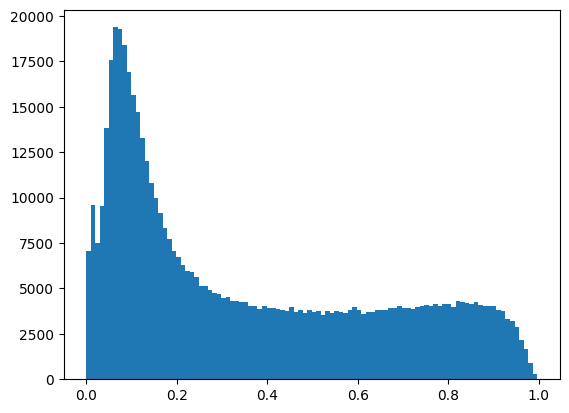

In [3]:
flat_list = [] # Flatten the list of lists
for l in data.r_conf:
    split = l.split(', ')
    split[0] = split[0][1:]
    split[len(split)-1] = split[len(split)-1][:-1]
    for i in split:
        flat_list.append(float(i))

plt.hist(flat_list,bins=100)
plt.show()


Plot normalized histogram

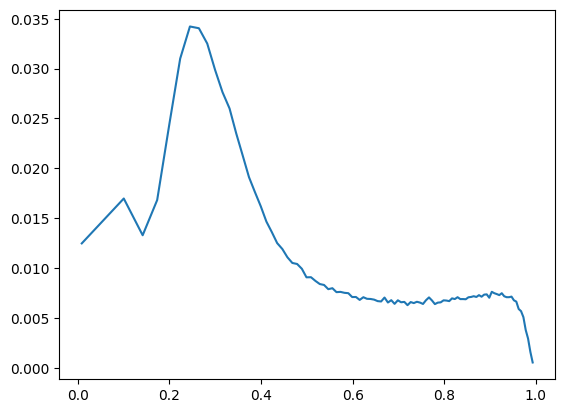

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [4]:
counts, bins = np.histogram(flat_list,bins=100)
len(bins)
bins = bins[:-1]
plt.plot(np.sqrt(bins),counts/sum(counts))
plt.show()
plt.close

Plot raw histogram

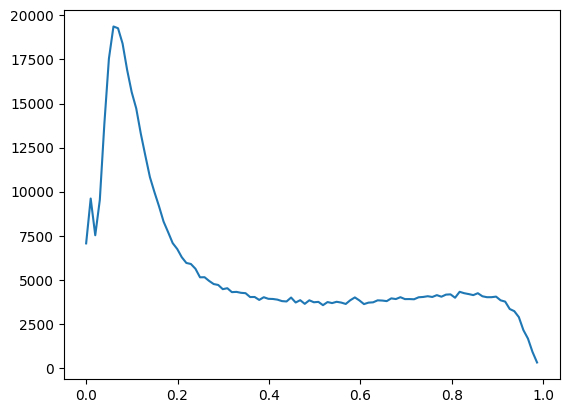

In [5]:
plt.plot(bins[0:100],counts[0:100])
plt.show()

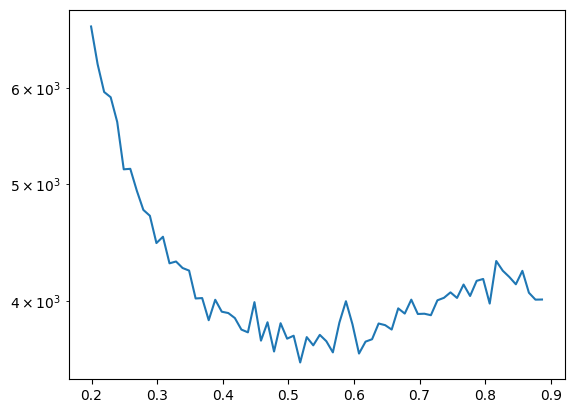

In [6]:
plt.plot(bins[20:90],counts[20:90])
plt.yscale('log')
plt.show()

Fit and plot the curve

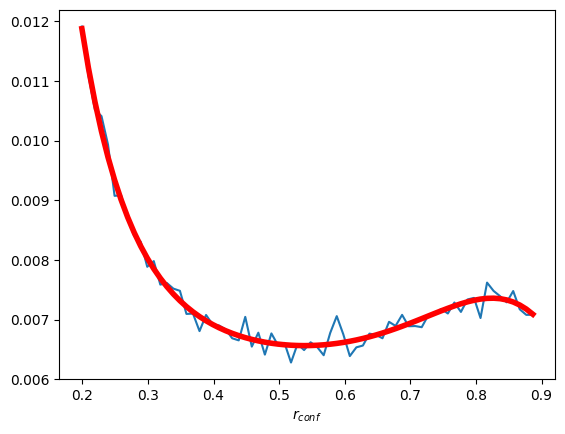

In [7]:
lower = 20 # Adjust boundaries as required
upper = 90
z = np.polyfit(bins[lower:upper],np.log10(counts[lower:upper]/sum(counts)),5)
plt.plot(bins[lower:upper],(counts[lower:upper]/sum(counts)),label="Normalized counts")
plt.plot(bins[lower:upper],10**(np.polyval(z,bins[lower:upper])),linewidth=4,color ='r',label="Fit")
plt.xlabel(r"$r_{conf}$")
plt.show()

Find minimum

In [8]:
def pprime(x):
    return 5*z[0]*x**4 + 4*z[1]*x**3 + 3*z[2]*x**2 + 2*z[3]*x + z[4]

result = newton(pprime, 0.55) # Type in the estimated minimum
result

0.5384383892968736

## Check the phases

Import a given trajectory

In [25]:
traj = pd.read_csv(r'.csv', sep='\t') # Path to trajectory
traj = traj.loc[traj.particle=='particle_number']
traj.reset_index(inplace=True)

Import a random trajectory

In [4]:
input_path = r'' # Path to folder
paths, names = get_file_list(input_path, '_rejoined.csv')

In [16]:
random_file = pd.read_csv(paths[int(np.random.rand()*len(paths))], sep='\t')
random_id = random_file.particle.unique()[int(np.random.rand()*random_file.particle.nunique())]
traj = random_file.loc[random_file.particle==random_id]

In [15]:
r_conf = confinement(traj.x, traj.y, 7) # Replace with desired sliding window size
traj['r_conf'] = r_conf

Plot the trajectory with confinement ratio as color map

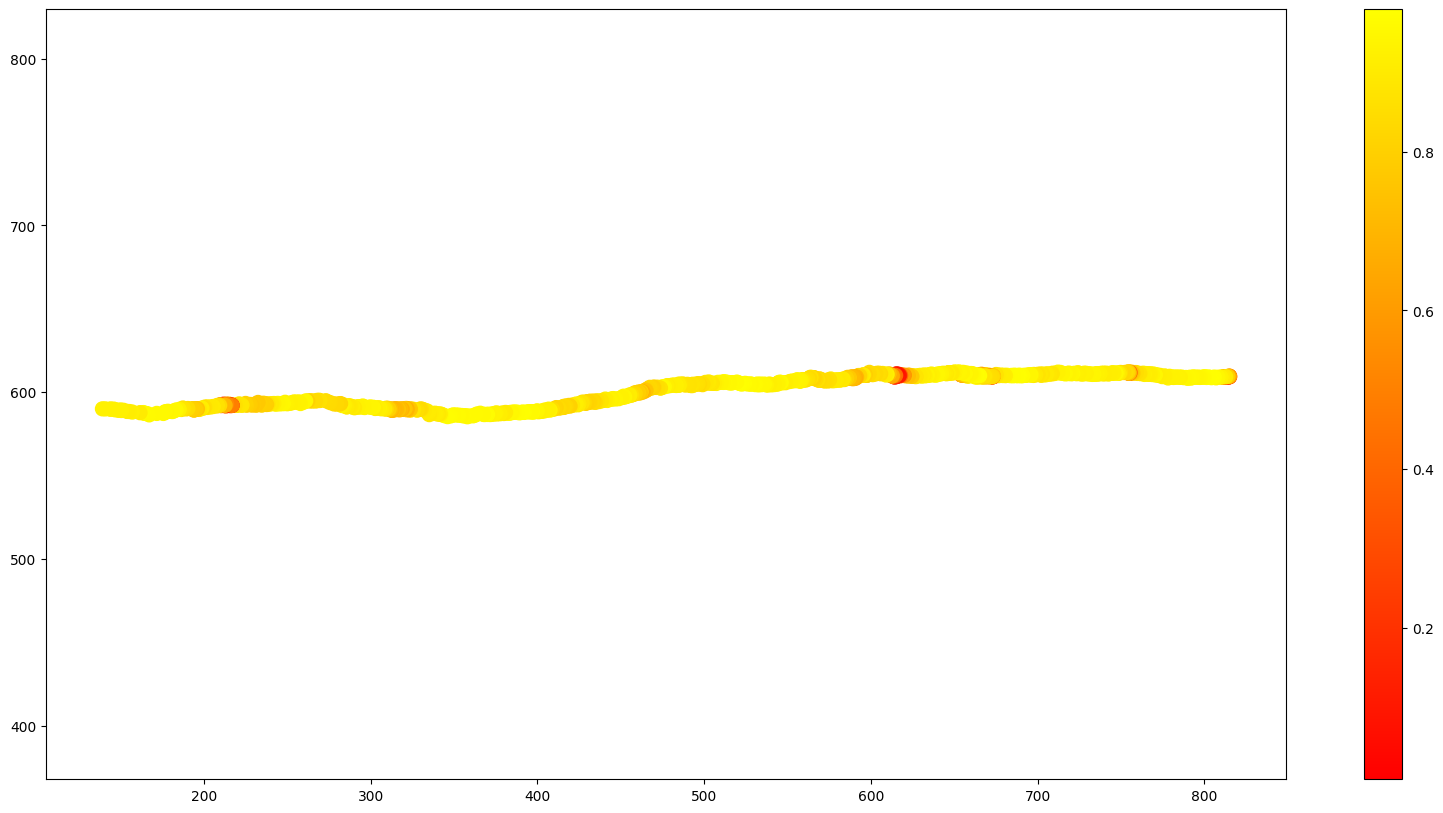

In [16]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
t = ax1.scatter(traj.x, traj.y,c=r_conf,cmap='autumn',s=100)
fig.colorbar(t, ax=ax1)
plt.axis('equal')
plt.show()

Set the threshold based on previously calculated minimum

In [21]:
thr = 0.53 # Threshold
tgo = traj.loc[traj.r_conf > thr]
tstop = traj.loc[traj.r_conf <= thr]

Plot phases

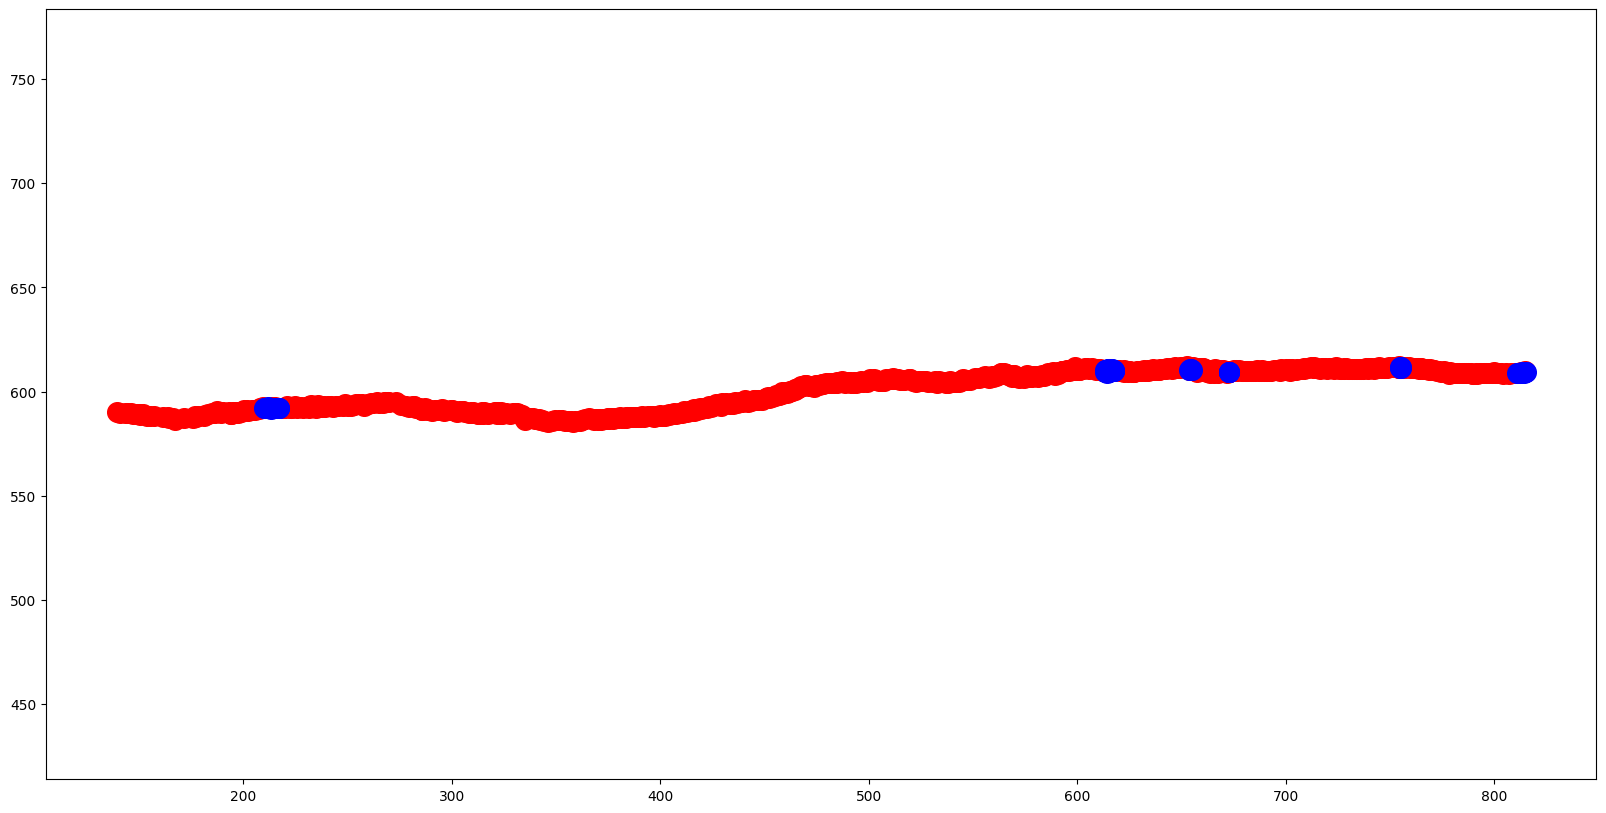

In [22]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
go = ax1.scatter(tgo.x, tgo.y,c='red',s=200)
stop = ax1.scatter(tstop.x, tstop.y,c='blue',s=200)
plt.axis('equal')
plt.show()